<a href="https://colab.research.google.com/github/rajjjxd/ML-Tutorials/blob/main/Outlier_Using_percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<ipython-input-7-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

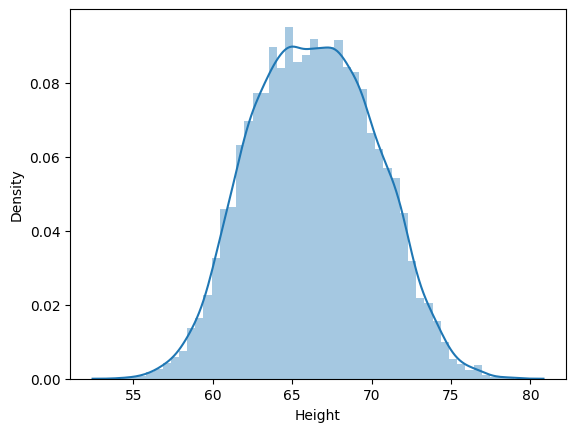

In [ ]:
sns.distplot(df['Height'])

<Axes: ylabel='Weight'>

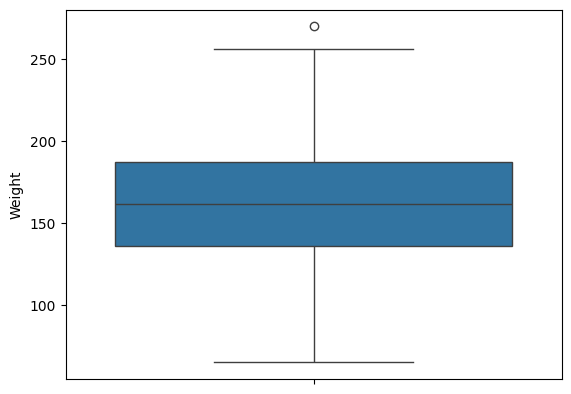

In [ ]:
sns.boxplot(df['Weight'])

<Axes: ylabel='Height'>

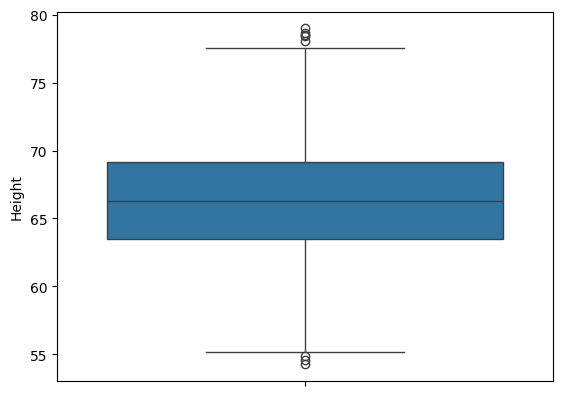

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
df['Heightt'].describe()

KeyError: 'Heightt'

In [ ]:

lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [ ]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [ ]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: ylabel='Height'>

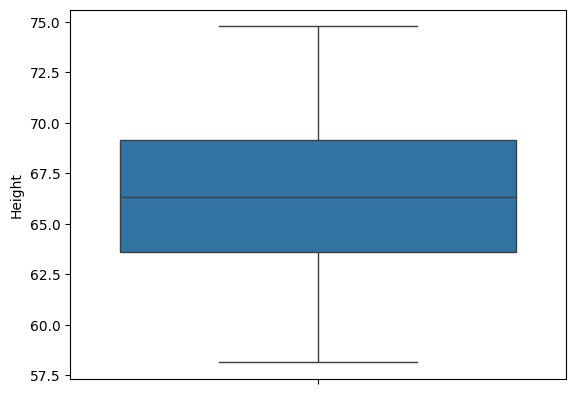

In [ ]:
sns.boxplot(new_df['Height'])

CAPPING( WINSORITATION)


In [ ]:
# Replace values exceeding upper limit with upper limit value
df['cgpa'] = df['Height'].clip(upper=upper_limit)

# Replace values below lower limit with lower limit value
df['cgpa'] = df['Height'].clip(lower=lower_limit)

df

,Gender,Height,Weight,cgpa
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243


<Axes: ylabel='Height'>

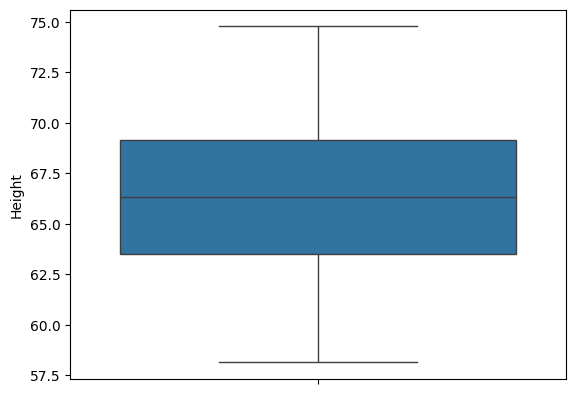

In [ ]:
sns.boxplot(df['Height'])